# **Project Name : ✨ Sales Prediction  ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Importing Libraries**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_regression

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# **Load Dataset**

In [68]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Seles Prediction/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [69]:
df.shape

(200, 5)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [71]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# **Univariate Analysis**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<ipython-input-73-6c673404762f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TV"], kde=True, color="orange", bins=10)


<Axes: xlabel='TV', ylabel='Density'>

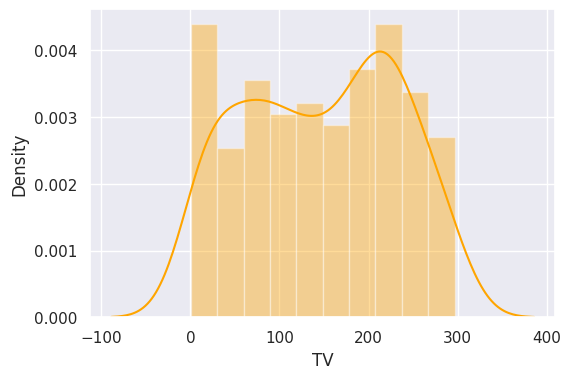

In [73]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["TV"], kde=True, color="orange", bins=10)

<ipython-input-74-c4284576d51d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Radio"], kde=True, color="orange", bins=10)


<Axes: xlabel='Radio', ylabel='Density'>

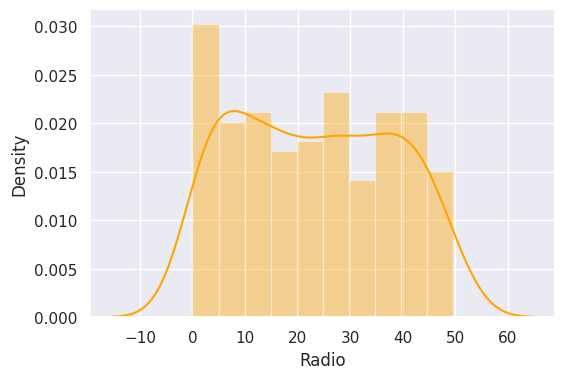

In [74]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Radio"], kde=True, color="orange", bins=10)

<ipython-input-75-964a8d416a50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"], kde=True, color="orange", bins=10)


<Axes: xlabel='Newspaper', ylabel='Density'>

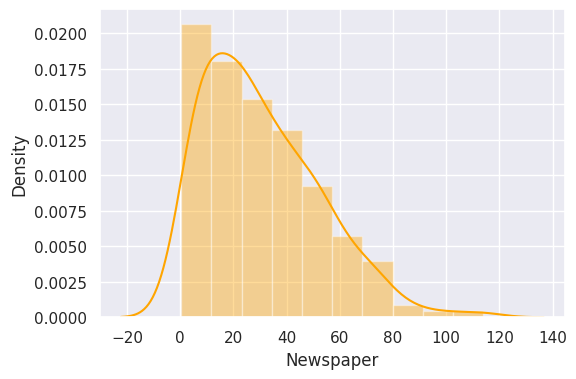

In [75]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Newspaper"], kde=True, color="orange", bins=10)

<ipython-input-76-9b250ba7600e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"], kde=True, color="orange", bins=10)


<Axes: xlabel='Sales', ylabel='Density'>

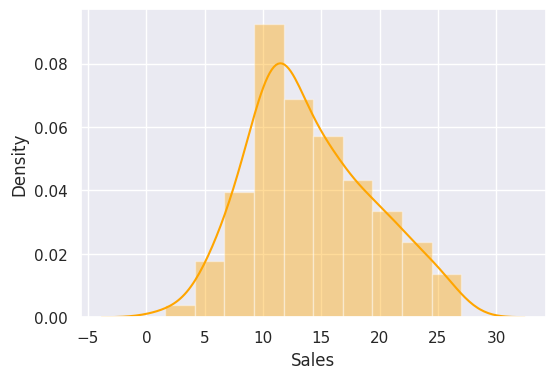

In [76]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Sales"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [77]:
df.duplicated().sum()

0

#### **Check And Remove NaN Values**

In [78]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#### **Remove Outlier**

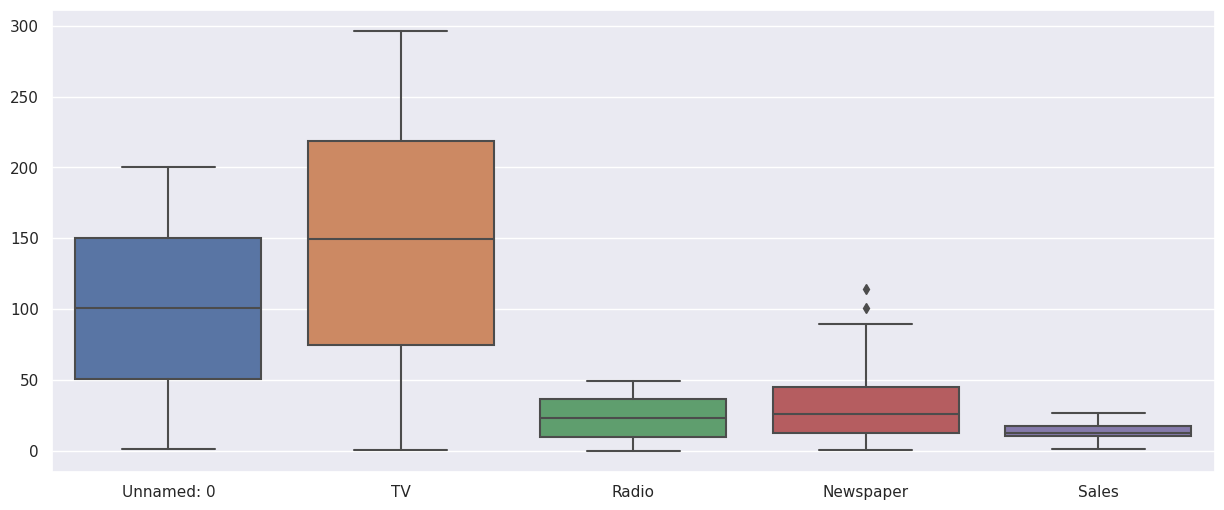

In [79]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [80]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [81]:
for i in df.columns:
  lower_range,upper_range = remove_outlier(df[i])
  df[i] = np.where(df[i] > upper_range, upper_range, df[i])
  df[i] = np.where(df[i] < lower_range, lower_range, df[i])

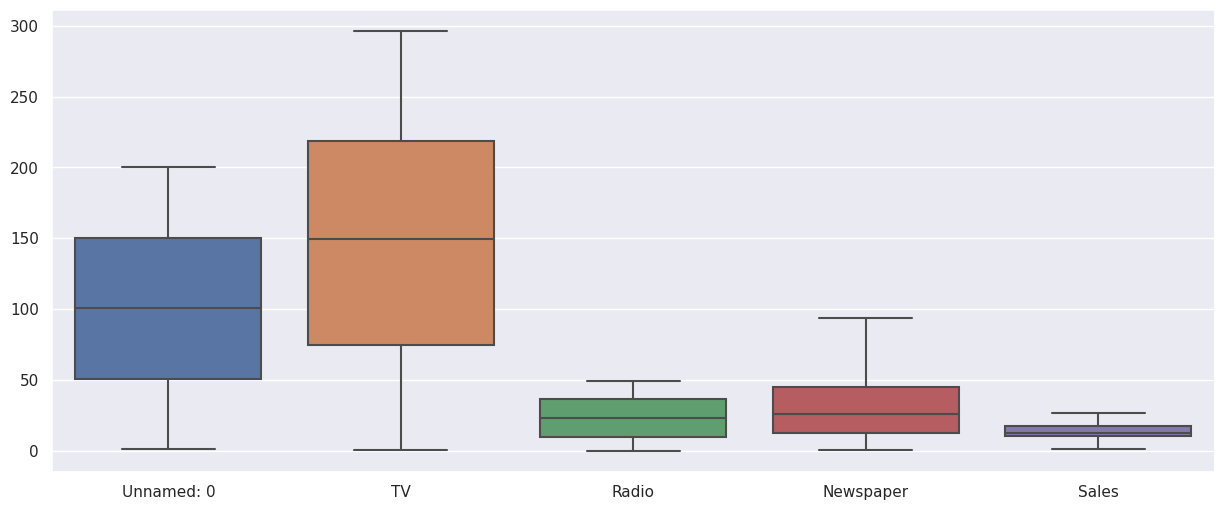

In [82]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

#### **Bivariat Analysis**

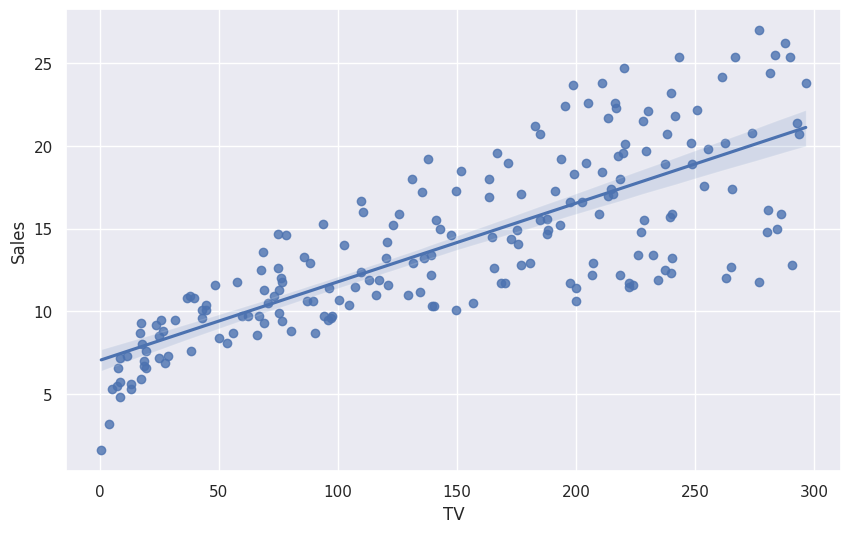

In [83]:
plt.figure(figsize=(10,6))
sns.regplot(x="TV", y="Sales", data=df)
plt.show()

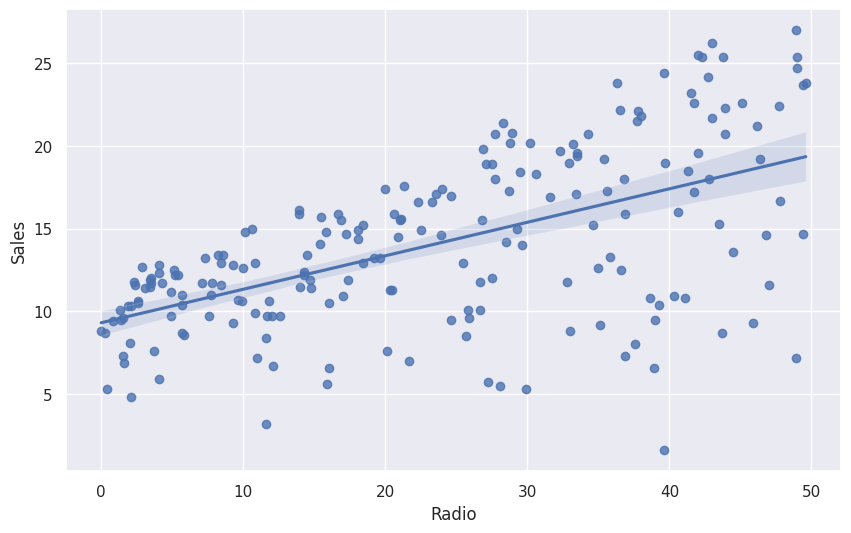

In [84]:
plt.figure(figsize=(10,6))
sns.regplot(x="Radio", y="Sales", data=df)
plt.show()

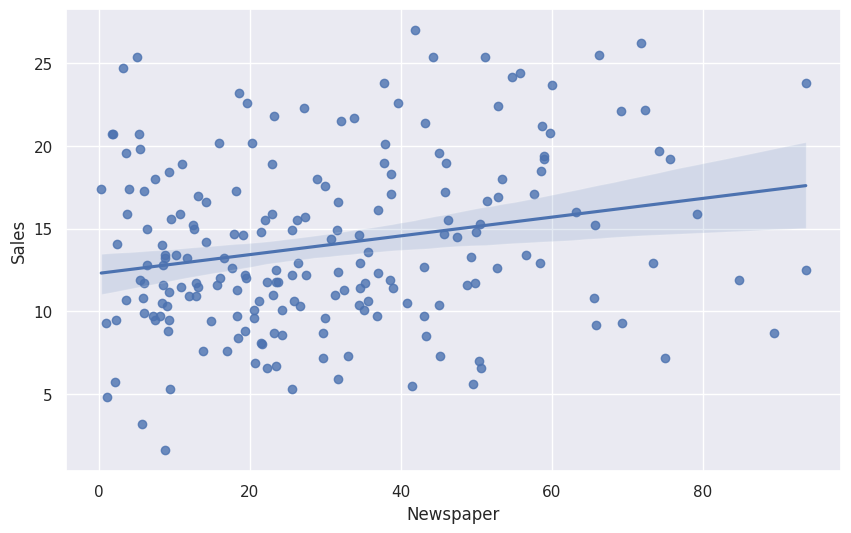

In [85]:
plt.figure(figsize=(10,6))
sns.regplot(x="Newspaper", y="Sales", data=df)
plt.show()

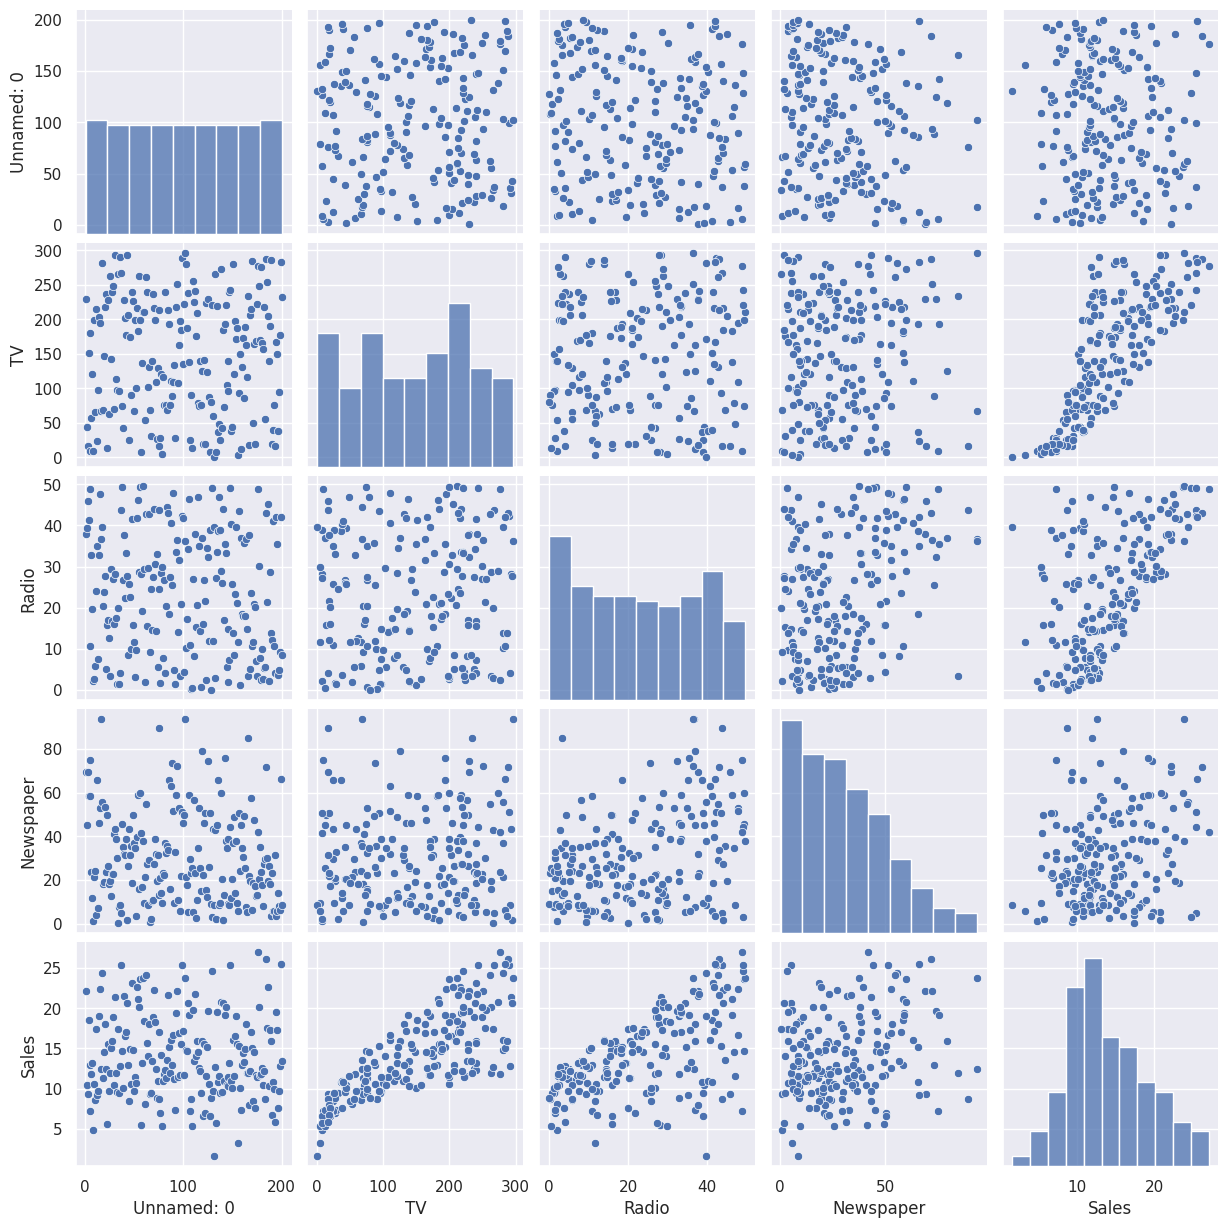

In [86]:
sns.pairplot(df)
plt.show()

<Axes: >

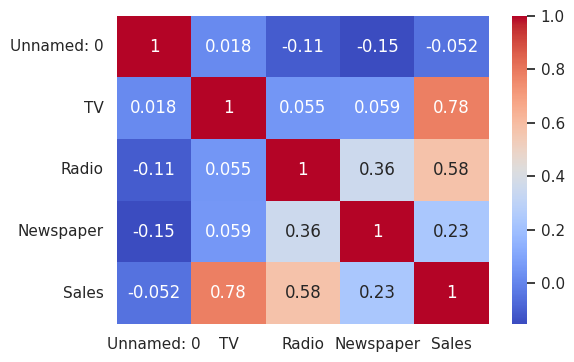

In [87]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


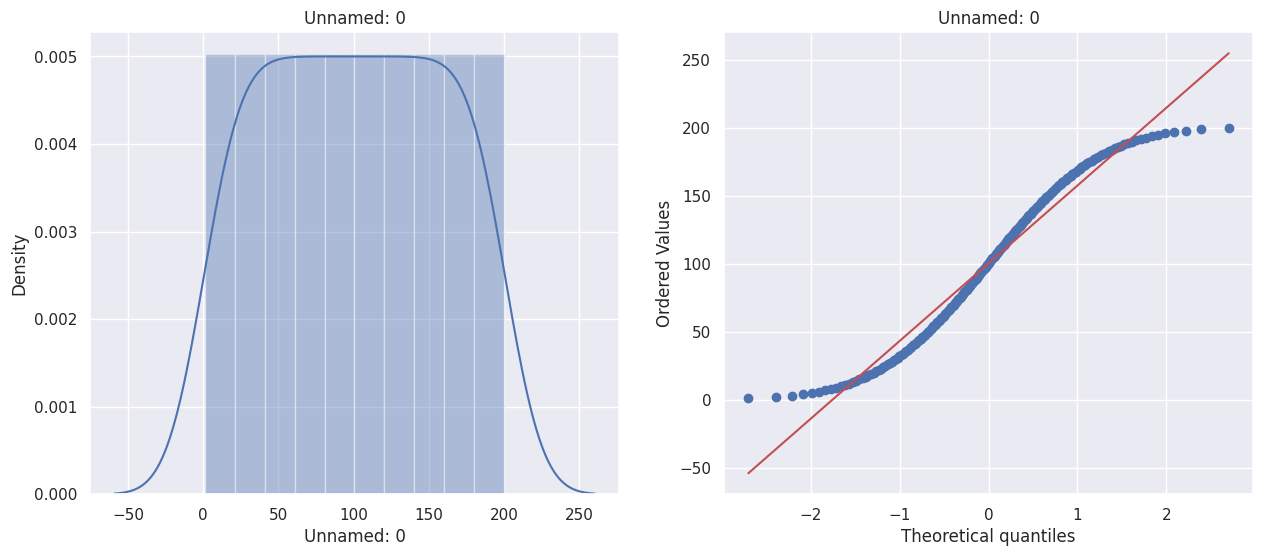

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


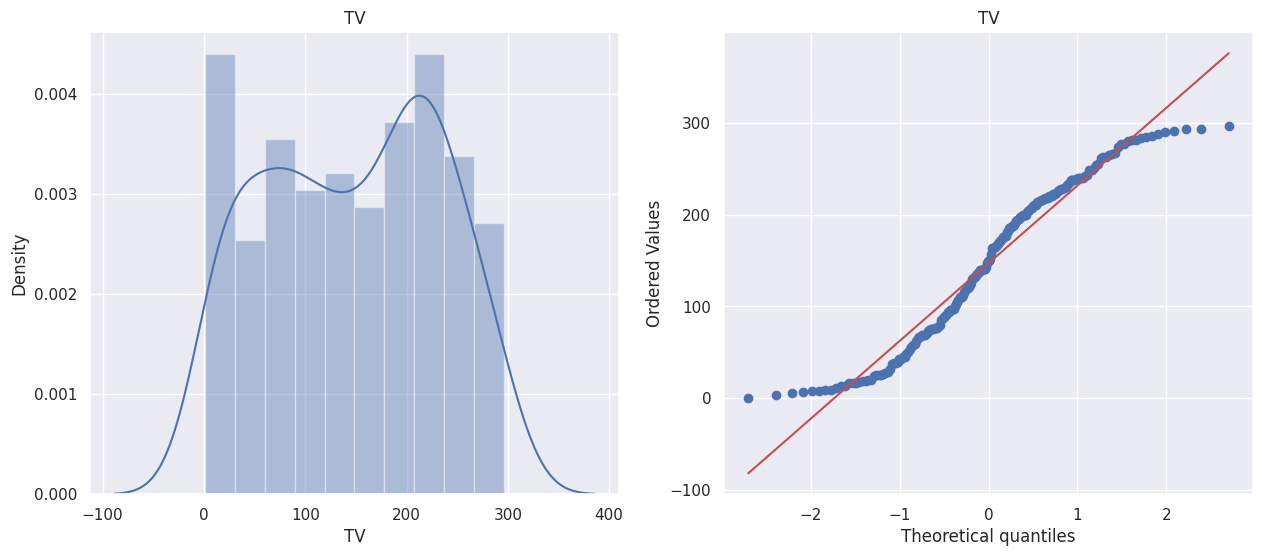

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


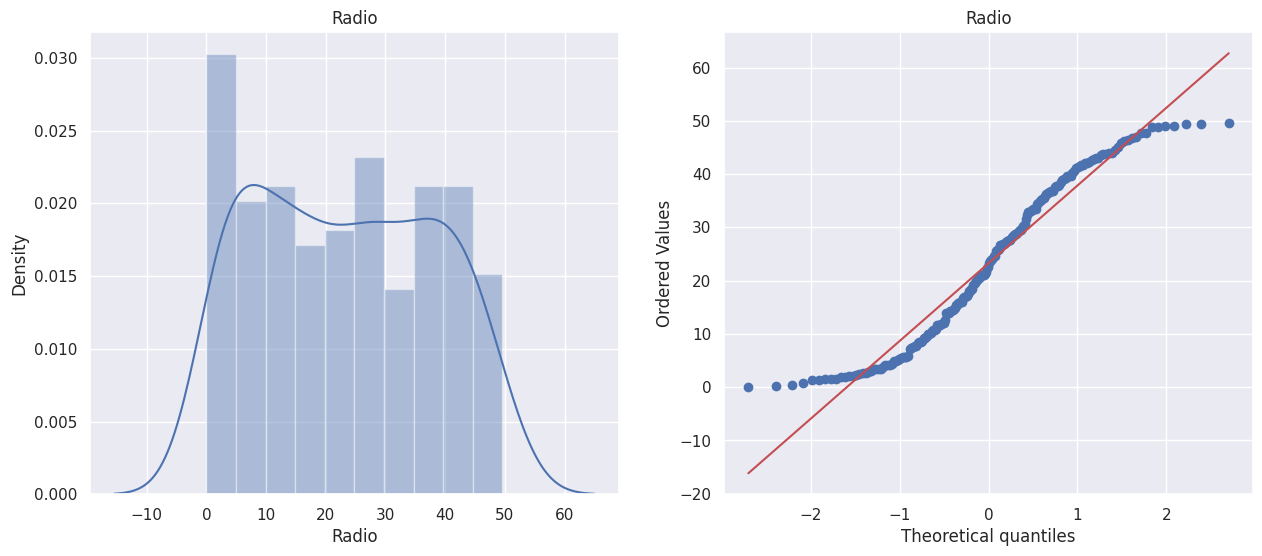

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


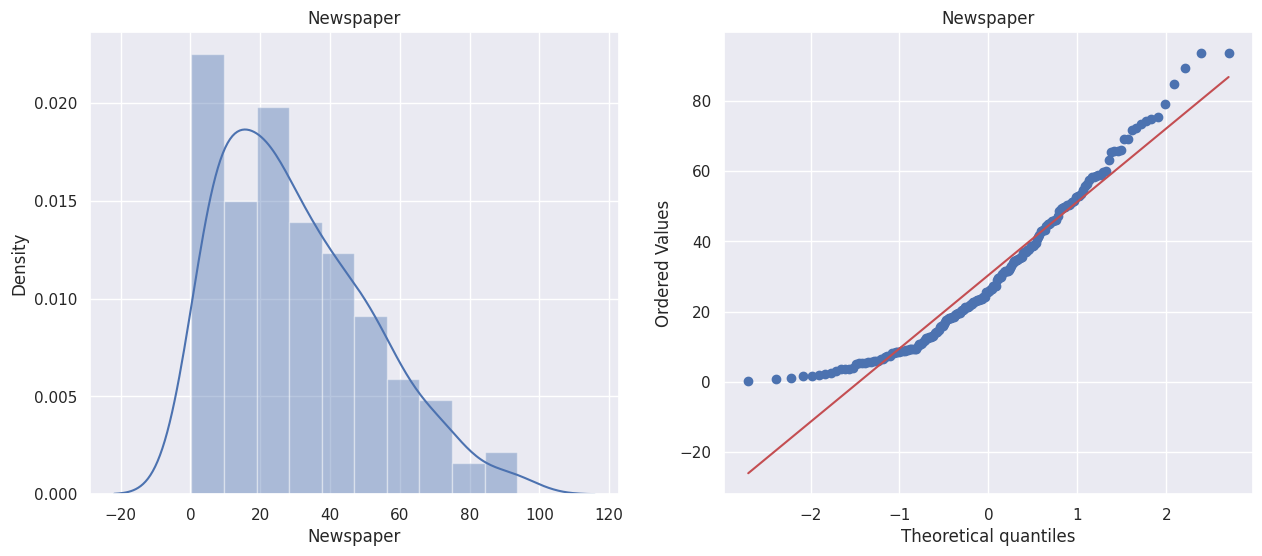

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


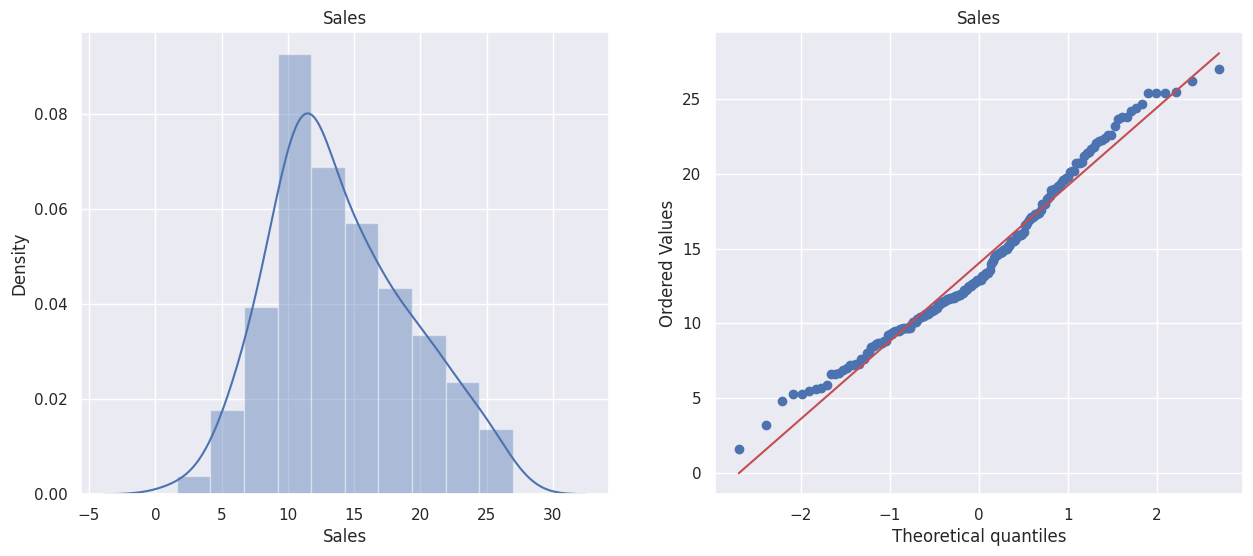

In [88]:
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
  plots(df, i)

# **Feature Engineering**

#### **Mutual Information**

In [89]:
X = df.iloc[:,1:4]
Y = df.iloc[:,-1]

In [90]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [91]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [92]:
mi_score = mutual_info_regression(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

Newspaper    0.000000
Radio        0.474413
TV           0.669797
dtype: float64

<Axes: >

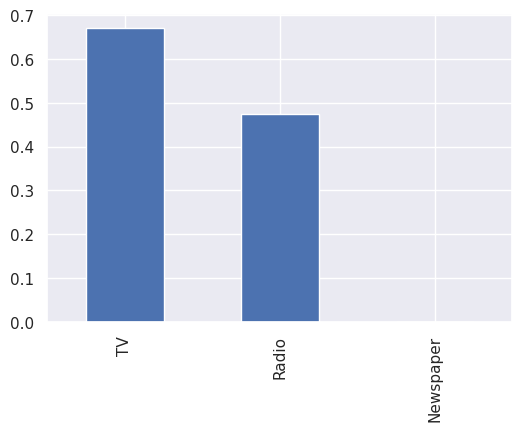

In [93]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [94]:
X = X[["TV","Radio"]]

#### **Splitting Data Into Train and Test**

In [95]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [96]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (160, 2)
train_label :  (160,)
test_data :  (40, 2)
test_label :  (40,)


#### **Normalizing Data**

In [97]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [98]:
train_data_sc.shape

(160, 2)

# **Model**

#### **Linear Regression**

In [99]:
model_lr = LinearRegression().fit(train_data_sc,train_label)

In [100]:
model_lr.score(train_data_sc,train_label)

0.906590009997456

In [101]:
y_pred = model_lr.predict(test_data_sc)
y_pred

array([11.05125807,  8.55682188,  8.1659954 , 24.59592031, 12.99471476,
        7.71443612, 13.79226512, 15.89661531, 11.84758155, 17.08016936,
       23.45386535, 10.18872048, 11.43520149, 16.24696327, 12.52429201,
       13.06800728, 19.37475686, 11.70271796, 16.71483256, 18.00149288,
       24.63738798, 10.60513772, 15.96560149, 13.33550187,  6.90380279,
       16.00952153, 13.21075868, 21.49168864, 14.28630033, 10.1378368 ,
       14.01507731, 22.03785629, 18.87624861, 21.73110867,  7.78723406,
        7.30925881,  9.04338932, 14.01245962, 15.52453072,  7.37267079])

In [102]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred,test_label))
print("R2_Score : ",r2_score(y_pred,test_label))

Mean Absolute Error :  1.4808281663710496
Mean Squared Error :  5.399956459132227
R2_Score :  0.7783725854440099


In [103]:
print(" Train Data Cross_val_score : ",cross_val_score(model_lr,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_lr,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.9010773153077543
Test Data Cross_val_score :  0.8538154987789156


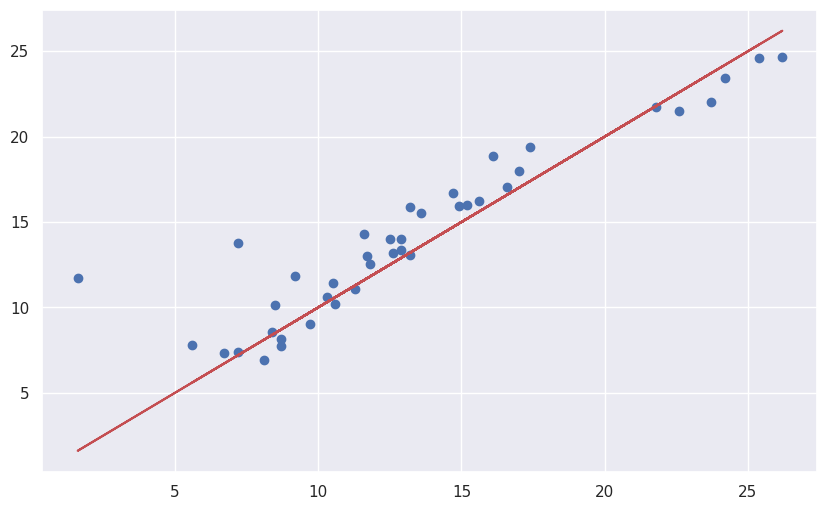

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred)
plt.plot(test_label,test_label,'r')

#### **Random Forest Model**

In [105]:
model_rf = RandomForestRegressor().fit(train_data_sc,train_label)

In [106]:
y_pred_2 = model_rf.predict(test_data_sc)

In [107]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_2,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_2,test_label))
print("R2_Score : ",r2_score(y_pred_2,test_label))

Mean Absolute Error :  1.324424999999999
Mean Squared Error :  3.280209424999999
R2_Score :  0.8539328928897129


In [108]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.9776772873718509
Test Data Cross_val_score :  0.8900522126794052


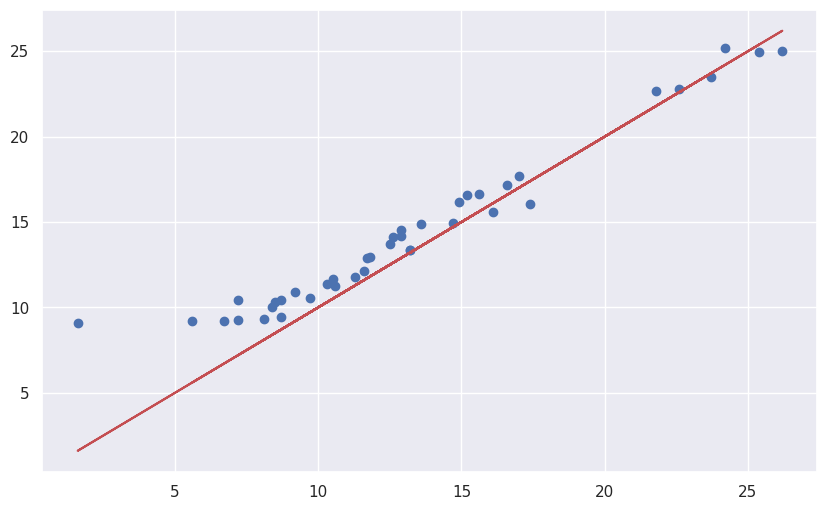

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')

#### **Decision Tree Model**

In [110]:
model_tree = DecisionTreeRegressor().fit(train_data_sc,train_label)

In [111]:
y_pred_3 = model_tree.predict(test_data_sc)

In [112]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_3,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_3,test_label))
print("R2_Score : ",r2_score(y_pred_3,test_label))

Mean Absolute Error :  1.5125000000000004
Mean Squared Error :  4.24525
R2_Score :  0.8112727337390693


In [113]:
print(" Train Data Cross_val_score : ",cross_val_score(model_tree,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_tree,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.9513538330754281
Test Data Cross_val_score :  0.8704271233124212


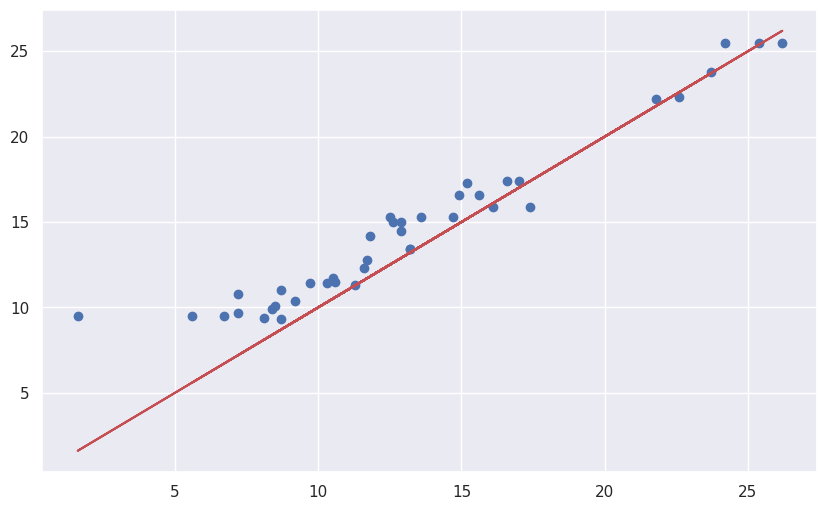

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_3)
plt.plot(test_label,test_label,'r')